Importing the Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset:

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Prifina Project/Calories.csv')

Exploratory Data Analysis:

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

,date,weight(lbs),height(in),age,activity_level,calories_burned
0,2022-10-01,181,70,27,1.6,2919
1,2022-10-02,168,72,27,2.2,4092
2,2022-10-03,154,74,27,2.2,3498
3,2022-10-04,170,66,27,1.3,2146
4,2022-10-05,164,65,27,2.3,4066


In [22]:
# checking the number of rows and columns
df.shape

(151, 6)

In [23]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             151 non-null    object 
 1   weight(lbs)      151 non-null    int64  
 2   height(in)       151 non-null    int64  
 3   age              151 non-null    int64  
 4   activity_level   151 non-null    float64
 5   calories_burned  151 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 8.3+ KB


In [36]:
duplicate_rows_df =df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 6)


In [4]:
# Checking for null values
df.isnull().sum()

date               0
weight(lbs)        0
height(in)         0
age                0
activity_level     0
calories_burned    0
dtype: int64

In [5]:
# Describing the dataset
df.describe()

,weight(lbs),height(in),age,activity_level,calories_burned
count,151.000000,151.000000,151.0,151.000000,151.000000
mean,167.483444,71.125828,27.0,1.927152,3406.105960
std,14.208380,3.258434,0.0,0.386943,864.382023
min,145.000000,64.000000,27.0,1.300000,1844.000000
25%,157.000000,68.000000,27.0,1.600000,2684.000000
50%,167.000000,72.000000,27.0,2.000000,3516.000000
75%,179.000000,74.000000,27.0,2.200000,4121.000000
max,195.000000,76.000000,27.0,2.500000,5421.000000


In [7]:
print(df.columns)

Index(['date', 'weight(lbs)', 'height(in)', 'age', 'activity_level',
       'calories_burned'],
      dtype='object')


<Axes: xlabel='calories_burned', ylabel='Count'>

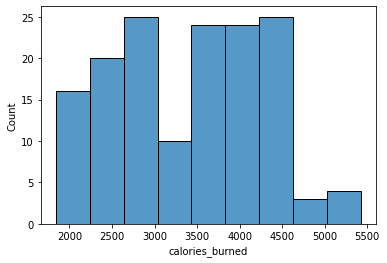

In [8]:
sns.histplot(data=df, x="calories_burned")


<Axes: xlabel='calories_burned', ylabel='count'>

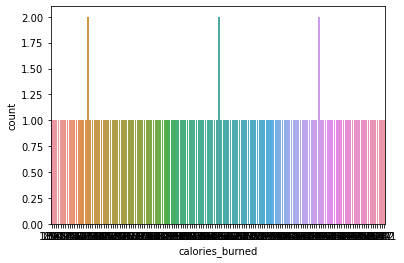

In [9]:
sns.countplot(x="calories_burned", data=df)


Data Visualization

In [11]:
# Creating a correlation matrix
corr = df.corr()

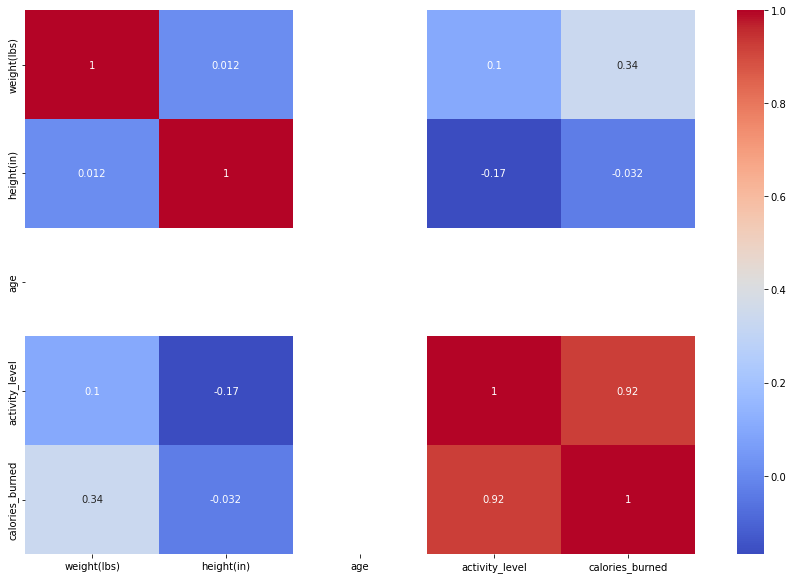

In [12]:
# Plotting the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

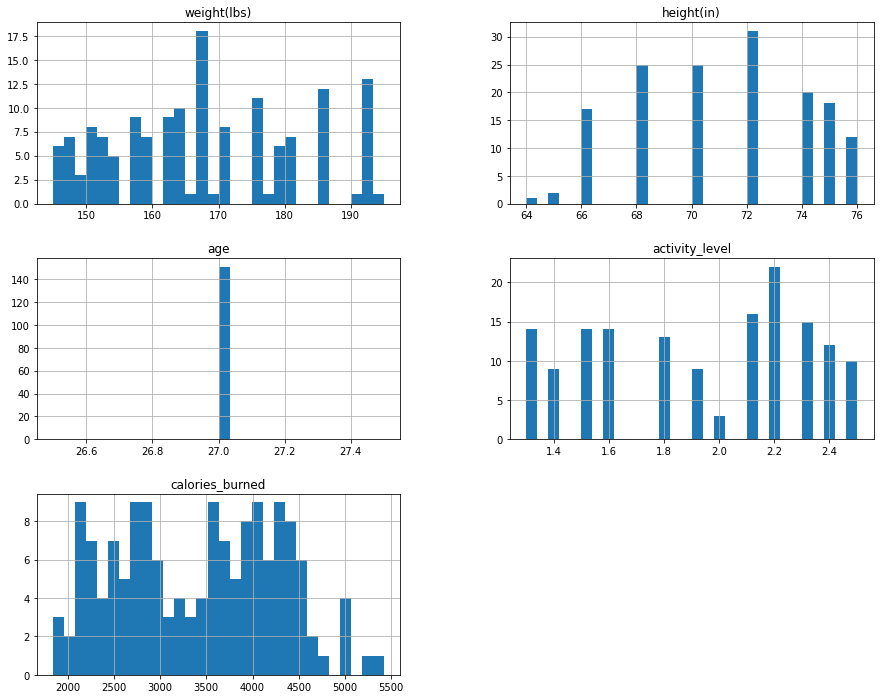

In [13]:
# Plotting histogram of all features
df.hist(figsize=(15,12), bins=30)
plt.show()

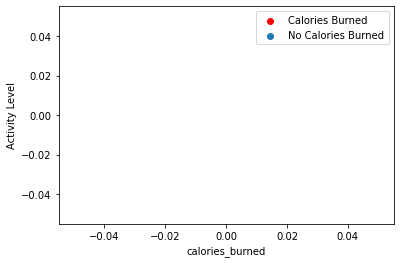

In [18]:
# Plotting scatter plot of calories_burned vs activity_level
plt.scatter(x=df.calories_burned[df.calories_burned==1], y=df.activity_level[(df.calories_burned==1)], c="red")
plt.scatter(x=df.calories_burned[df.calories_burned==0], y=df.activity_level[(df.calories_burned==0)])
plt.legend(["Calories Burned", "No Calories Burned"])
plt.xlabel("calories_burned")
plt.ylabel("Activity Level")
plt.show()


In [25]:
# Removing the date column
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [30]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression R^2 Score:", lr_r2)

Linear Regression Mean Squared Error: 72526.34879601725
Linear Regression R^2 Score: 0.8819315228569921


In [34]:
# Random Forest Regression
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_r2 = r2_score(y_test, rfr_pred)
print("Random Forest Regression Mean Squared Error:", rfr_mse)
print("Random Forest Regression R^2 Score:", rfr_r2)

Random Forest Regression Mean Squared Error: 82835.75120260213
Random Forest Regression R^2 Score: 0.865148443843551


In [35]:
# XGBoost Regression
xgb = XGBRegressor(n_estimators = 100, random_state = 0)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost Regression Mean Squared Error:", xgb_mse)
print("XGBoost Regression R^2 Score:", xgb_r2)

XGBoost Regression Mean Squared Error: 89763.04972896076
XGBoost Regression R^2 Score: 0.8538712238910822


In [37]:
from sklearn.svm import SVR

# SVR model
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print("SVR Mean Squared Error:", svr_mse)
print("SVR R^2 Score:", svr_r2)


SVR Mean Squared Error: 620265.8560359823
SVR R^2 Score: -0.00975502368036274


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression model
gbr = GradientBoostingRegressor(n_estimators = 100, random_state = 0)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
print("Gradient Boosting Regression Mean Squared Error:", gbr_mse)
print("Gradient Boosting Regression R^2 Score:", gbr_r2)


Gradient Boosting Regression Mean Squared Error: 77240.32960457343
Gradient Boosting Regression R^2 Score: 0.8742574493018352
